In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
%matplotlib inline

In [13]:
df=pd.read_csv('input_file_visibility.csv')
df

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-01-01 00:51:00,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.97,29.99,0.01
1,2010-01-01 01:51:00,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.97,29.99,0.02
2,2010-01-01 02:51:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.97,29.99,0.02
3,2010-01-01 03:51:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.95,29.97,0.02
4,2010-01-01 04:51:00,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.93,29.96,0.02
...,...,...,...,...,...,...,...,...,...,...,...
75078,2018-07-27 18:51:00,10.0,76.0,73.0,72.0,88.0,3.0,230.0,30.00,30.02,0.00
75079,2018-07-27 19:51:00,4.0,69.0,69.0,69.0,100.0,13.0,40.0,29.99,30.01,1.16
75080,2018-07-27 20:51:00,10.0,71.0,70.0,70.0,96.0,0.0,0.0,30.02,30.04,0.01
75081,2018-07-27 21:51:00,10.0,72.0,71.0,70.0,94.0,5.0,50.0,30.00,30.02,0.01


In [14]:
df.corr()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
VISIBILITY,1.000000,0.063499,-0.034205,-0.129985,-0.465327,0.020778,0.173371,0.194537,0.194505,-0.293458
DRYBULBTEMPF,0.063499,1.000000,0.970013,0.888192,0.126035,-0.159370,-0.125621,-0.212059,-0.209948,-0.000320
WETBULBTEMPF,-0.034205,0.970013,1.000000,0.969145,0.351903,-0.214081,-0.201306,-0.237525,-0.235166,0.041163
DewPointTempF,-0.129985,0.888192,0.969145,1.000000,0.559575,-0.261974,-0.270603,-0.257653,-0.257096,0.077397
RelativeHumidity,-0.465327,0.126035,0.351903,0.559575,1.000000,-0.277406,-0.369105,-0.195860,-0.199092,0.193205
WindSpeed,0.020778,-0.159370,-0.214081,-0.261974,-0.277406,1.000000,0.359374,-0.266817,-0.267428,0.057189
WindDirection,0.173371,-0.125621,-0.201306,-0.270603,-0.369105,0.359374,1.000000,-0.141398,-0.141826,-0.075277
StationPressure,0.194537,-0.212059,-0.237525,-0.257653,-0.195860,-0.266817,-0.141398,1.000000,0.997309,-0.119309
SeaLevelPressure,0.194505,-0.209948,-0.235166,-0.257096,-0.199092,-0.267428,-0.141826,0.997309,1.000000,-0.122211
Precip,-0.293458,-0.000320,0.041163,0.077397,0.193205,0.057189,-0.075277,-0.119309,-0.122211,1.000000


## DRYBULBTEMPF and WETBULBTEMPF highly correlated. DEWPointTempF and WETBULBTEMPF are highly correlated. StationPressure and SeaLevelPreessure are highly correlated

## So we will remove DRYBULBTEMPF, WETBULBTEMPF, SeaLevelPressure column

In [5]:
x=df.drop(columns=['DATE','DRYBULBTEMPF','SeaLevelPressure','WETBULBTEMPF','VISIBILITY'])
y=df['VISIBILITY']

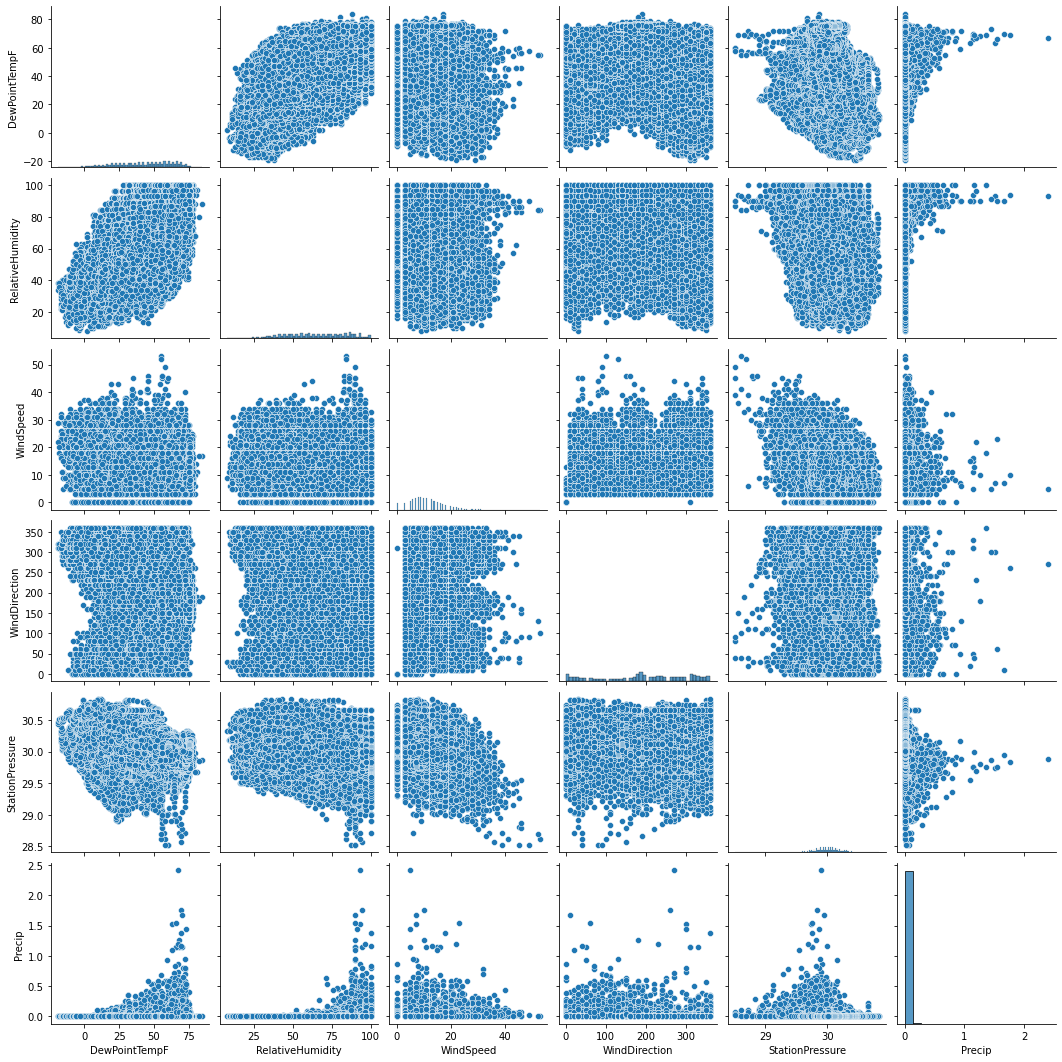

In [6]:
sns.pairplot(x)

In [7]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [8]:
x1=scalar.fit_transform(x)
x1

array([[-0.58351851,  1.36630779, -1.84448892, -1.82511786, -0.15129122,
         0.12504606],
       [-0.53244032,  1.56732464, -1.84448892, -1.82511786, -0.15129122,
         0.40158676],
       [-0.53244032,  1.56732464, -1.84448892, -1.82511786, -0.15129122,
         0.40158676],
       ...,
       [ 1.40853103,  1.56732464, -1.84448892, -1.82511786,  0.06132012,
         0.12504606],
       [ 1.40853103,  1.46681621, -1.02495207, -1.36083119, -0.02372442,
         0.12504606],
       [ 1.45960923,  1.61757885, -1.84448892, -1.82511786,  0.01879785,
        -0.15149464]])

In [10]:
x1=pd.DataFrame(x1,columns=x.columns)
x1

,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,Precip
0,-0.583519,1.366308,-1.844489,-1.825118,-0.151291,0.125046
1,-0.532440,1.567325,-1.844489,-1.825118,-0.151291,0.401587
2,-0.532440,1.567325,-1.844489,-1.825118,-0.151291,0.401587
3,-0.532440,1.567325,-1.844489,-1.825118,-0.236336,0.401587
4,-0.583519,1.366308,-1.844489,-1.825118,-0.321380,0.401587
...,...,...,...,...,...,...
75078,1.510687,1.165291,-1.352767,0.310601,-0.023724,-0.151495
75079,1.357453,1.768341,0.286307,-1.453689,-0.066247,31.927227
75080,1.408531,1.567325,-1.844489,-1.825118,0.061320,0.125046
75081,1.408531,1.466816,-1.024952,-1.360831,-0.023724,0.125046


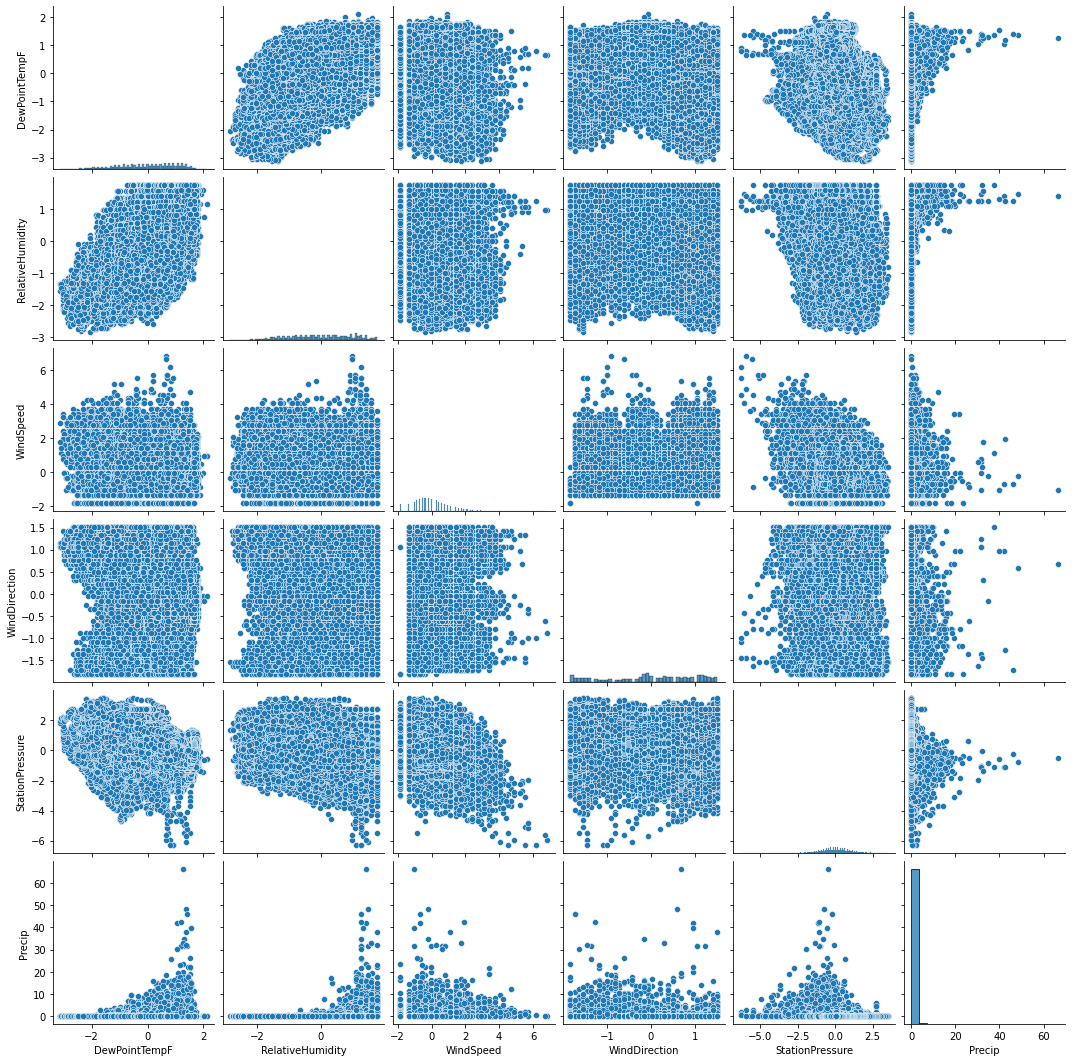

In [11]:
sns.pairplot(x1)

## based on the pairplot, we came to know that tree based algorithm works well

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [49]:
rf=RandomForestRegressor(max_depth=8)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=8)

In [50]:
rf.score(x_test,y_test)

0.6037146343020406

In [51]:
rf.score(x_train,y_train)

0.6382690429476547

In [33]:
from xgboost import XGBRFRegressor

In [34]:
xgb=XGBRFRegressor()
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [35]:
xgb.score(x_test,y_test)

0.5845924227985626

In [36]:
xgb.score(x_train,y_train)

0.5991838667629583

In [52]:
x=[]
y=[]
for i in [6,8,10,12]:
    rf=RandomForestRegressor(max_depth=i)
    rf.fit(x_train,y_train)
    x.append(rf.score(x_train,y_train))
    y.append(rf.score(x_test,y_test))

In [53]:
print(x,y)

[0.5969480513485461, 0.6394503712432525, 0.6963392349300634, 0.767963819005912] [0.5841142131097787, 0.6046905306670732, 0.6183929802031253, 0.6286393296774911]


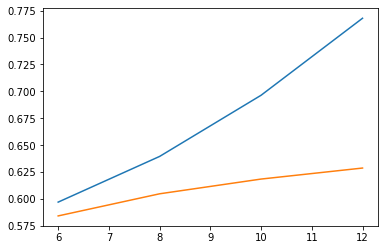

In [56]:
plt.plot([6,8,10,12],x)
plt.plot([6,8,10,12],y)